# Universidad Nacional de Ingeniería #
## Facultad de Ingeniería Económica, Estadística y CC.SS
### Finanzas Corporativas II - 2021-I
#### Teoría de Portafolio

Docente: Alfonso Chang Medina MSc \\
Fecha: Abril~Mayo 2021 \\
e-mail: achangm@uni.edu.pe

Trabajaremos portafolios de **9 activos**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
monthly_returns = pd.read_csv("datamensual2.csv", index_col ="Date")
monthly_returns

,MSFT.Adjusted,SHI.Adjusted,GE.Adjusted,TSN.Adjusted,AAPL.Adjusted,SBUX.Adjusted,GOOG.Adjusted,AMZN.Adjusted,INTC.Adjusted
Date,,,,,,,,,
01/02/2015,0.081945,0.173933,0.084252,0.056518,0.092077,0.065873,0.043706,0.069799,0.006336
01/03/2015,-0.068438,0.094373,-0.037315,-0.073242,-0.027936,0.016503,-0.018800,-0.021430,-0.054249
01/04/2015,0.179201,0.482224,0.087549,0.030850,0.005770,0.046021,-0.016902,0.125321,0.040118
01/05/2015,-0.037282,-0.207830,0.006992,0.072026,0.040173,0.046887,-0.009781,0.017509,0.057022
01/06/2015,-0.053094,0.092176,-0.026004,0.006574,-0.033770,0.034625,-0.022041,0.011259,-0.117494
01/07/2015,0.056151,-0.286012,-0.009378,0.039554,-0.033481,0.077313,0.183918,0.211162,-0.049530
01/08/2015,-0.070524,-0.111036,-0.050285,-0.047798,-0.073005,-0.057189,-0.011834,-0.044353,-0.014263
01/09/2015,0.023434,0.067573,0.015988,0.021573,-0.017542,0.040947,-0.016028,-0.001952,0.062820
01/10/2015,0.173395,0.079168,0.145806,0.028815,0.080113,0.096046,0.155540,0.201081,0.116381


In [11]:
mean_ret = monthly_returns.mean()
mean_ret

MSFT.Adjusted    0.024910
SHI.Adjusted     0.005483
GE.Adjusted     -0.010049
TSN.Adjusted     0.015619
AAPL.Adjusted    0.017009
SBUX.Adjusted    0.013308
GOOG.Adjusted    0.015586
AMZN.Adjusted    0.027983
INTC.Adjusted    0.012434
dtype: float64

In [23]:
#Generating a random matrix of 1000 rows and 4 Columns
matrix = np.random.rand(10000,9)
matrix

array([[0.66244665, 0.47084056, 0.01204378, ..., 0.69591026, 0.29215704,
        0.57123252],
       [0.48791289, 0.93155626, 0.69697585, ..., 0.84859146, 0.40880258,
        0.82947397],
       [0.92815137, 0.29704817, 0.34691342, ..., 0.25894406, 0.77926552,
        0.69997417],
       ...,
       [0.25188974, 0.97440287, 0.55736673, ..., 0.32230323, 0.61938185,
        0.49692839],
       [0.65751507, 0.11258587, 0.12762429, ..., 0.09070256, 0.45763595,
        0.73843696],
       [0.15384535, 0.35879575, 0.05725661, ..., 0.73069565, 0.84953198,
        0.13358892]])

In [24]:
#Converting to a data frame
matrix_df = pd.DataFrame(matrix, columns = monthly_returns.columns)
matrix_df

,MSFT.Adjusted,SHI.Adjusted,GE.Adjusted,TSN.Adjusted,AAPL.Adjusted,SBUX.Adjusted,GOOG.Adjusted,AMZN.Adjusted,INTC.Adjusted
0,0.662447,0.470841,0.012044,0.648247,0.223985,0.019888,0.695910,0.292157,0.571233
1,0.487913,0.931556,0.696976,0.675902,0.924570,0.600131,0.848591,0.408803,0.829474
2,0.928151,0.297048,0.346913,0.422725,0.250261,0.822432,0.258944,0.779266,0.699974
3,0.115060,0.610184,0.208176,0.915334,0.421385,0.621025,0.656126,0.667715,0.921975
4,0.410319,0.109573,0.584129,0.428427,0.959078,0.167152,0.808776,0.493998,0.013355
...,...,...,...,...,...,...,...,...,...
9995,0.372411,0.084083,0.865655,0.652734,0.188740,0.634684,0.533530,0.463360,0.190192
9996,0.823967,0.748355,0.585127,0.133756,0.433542,0.149374,0.152657,0.544390,0.535347
9997,0.251890,0.974403,0.557367,0.632622,0.631842,0.388706,0.322303,0.619382,0.496928
9998,0.657515,0.112586,0.127624,0.425089,0.685080,0.781476,0.090703,0.457636,0.738437


In [25]:
matrix_sum = matrix_df.sum(axis = 1)
matrix_sum

0       3.596750
1       6.403915
2       4.805715
3       5.136980
4       3.974805
          ...   
9995    3.985391
9996    4.106515
9997    4.875443
9998    4.076146
9999    3.992675
Length: 10000, dtype: float64

In [26]:
#Calculating portfolio weights
weights  = matrix_df.divide(matrix_sum , axis ="rows")
weights

,MSFT.Adjusted,SHI.Adjusted,GE.Adjusted,TSN.Adjusted,AAPL.Adjusted,SBUX.Adjusted,GOOG.Adjusted,AMZN.Adjusted,INTC.Adjusted
0,0.184179,0.130907,0.003349,0.180231,0.062274,0.005529,0.193483,0.081228,0.158819
1,0.076190,0.145467,0.108836,0.105545,0.144376,0.093713,0.132511,0.063836,0.129526
2,0.193135,0.061811,0.072188,0.087963,0.052076,0.171136,0.053883,0.162154,0.145655
3,0.022398,0.118783,0.040525,0.178185,0.082030,0.120893,0.127726,0.129982,0.179478
4,0.103230,0.027567,0.146958,0.107786,0.241289,0.042053,0.203476,0.124282,0.003360
...,...,...,...,...,...,...,...,...,...
9995,0.093444,0.021098,0.217207,0.163782,0.047358,0.159253,0.133872,0.116265,0.047722
9996,0.200649,0.182236,0.142487,0.032572,0.105574,0.036375,0.037174,0.132567,0.130365
9997,0.051665,0.199859,0.114321,0.129757,0.129597,0.079727,0.066107,0.127041,0.101925
9998,0.161308,0.027621,0.031310,0.104287,0.168070,0.191719,0.022252,0.112272,0.181161


In [27]:
#transpose
weights_t= np.transpose(weights)
weights_t

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
MSFT.Adjusted,0.184179,0.076190,0.193135,0.022398,0.103230,0.179987,0.156778,0.119157,0.010010,0.200463,...,0.206322,0.070083,0.182354,0.119498,0.098676,0.093444,0.200649,0.051665,0.161308,0.038532
SHI.Adjusted,0.130907,0.145467,0.061811,0.118783,0.027567,0.216021,0.218505,0.078206,0.183353,0.107508,...,0.183210,0.180915,0.030596,0.146527,0.144895,0.021098,0.182236,0.199859,0.027621,0.089863
GE.Adjusted,0.003349,0.108836,0.072188,0.040525,0.146958,0.078620,0.069647,0.126117,0.083461,0.056086,...,0.027102,0.210157,0.023147,0.160173,0.147268,0.217207,0.142487,0.114321,0.031310,0.014340
TSN.Adjusted,0.180231,0.105545,0.087963,0.178185,0.107786,0.123225,0.198950,0.139205,0.192547,0.164354,...,0.050657,0.067367,0.081104,0.048764,0.006121,0.163782,0.032572,0.129757,0.104287,0.150624
AAPL.Adjusted,0.062274,0.144376,0.052076,0.082030,0.241289,0.091216,0.043730,0.123172,0.215147,0.204864,...,0.050052,0.112282,0.165674,0.067838,0.040489,0.047358,0.105574,0.129597,0.168070,0.161366
SBUX.Adjusted,0.005529,0.093713,0.171136,0.120893,0.042053,0.003676,0.095270,0.141240,0.090284,0.066636,...,0.100597,0.088335,0.190897,0.147873,0.140657,0.159253,0.036375,0.079727,0.191719,0.116034
GOOG.Adjusted,0.193483,0.132511,0.053883,0.127726,0.203476,0.096014,0.155758,0.031365,0.027003,0.018608,...,0.202124,0.193191,0.212322,0.151794,0.164883,0.133872,0.037174,0.066107,0.022252,0.183009
AMZN.Adjusted,0.081228,0.063836,0.162154,0.129982,0.124282,0.069287,0.054522,0.062625,0.001554,0.020949,...,0.110098,0.034006,0.069888,0.108468,0.157878,0.116265,0.132567,0.127041,0.112272,0.212773
INTC.Adjusted,0.158819,0.129526,0.145655,0.179478,0.003360,0.141954,0.006839,0.178914,0.196641,0.160532,...,0.069839,0.043664,0.044018,0.049066,0.099131,0.047722,0.130365,0.101925,0.181161,0.033459


In [28]:
#Using the portfolio return formula
portfolio_return = np.dot(weights, mean_ret)
portfolio_return

array([0.01648339, 0.01241528, 0.01615012, ..., 0.01237861, 0.01663511,
       0.01717225])

In [29]:
#Variance covariance
cov_mat = monthly_returns.cov()
cov_mat

,MSFT.Adjusted,SHI.Adjusted,GE.Adjusted,TSN.Adjusted,AAPL.Adjusted,SBUX.Adjusted,GOOG.Adjusted,AMZN.Adjusted,INTC.Adjusted
MSFT.Adjusted,0.003257,0.003088,0.001250,0.000395,0.002257,0.001023,0.002078,0.002856,0.001824
SHI.Adjusted,0.003088,0.014616,0.002869,-0.001295,0.001566,0.000821,0.000867,0.002561,0.001699
GE.Adjusted,0.001250,0.002869,0.007941,0.000547,0.002369,0.000004,0.001188,0.001286,0.001118
TSN.Adjusted,0.000395,-0.001295,0.000547,0.005739,0.000707,-0.000204,0.000024,0.000782,0.000194
AAPL.Adjusted,0.002257,0.001566,0.002369,0.000707,0.005805,0.000545,0.001792,0.002147,0.002220
SBUX.Adjusted,0.001023,0.000821,0.000004,-0.000204,0.000545,0.002784,0.000805,0.000885,0.000635
GOOG.Adjusted,0.002078,0.000867,0.001188,0.000024,0.001792,0.000805,0.003201,0.002966,0.001197
AMZN.Adjusted,0.002856,0.002561,0.001286,0.000782,0.002147,0.000885,0.002966,0.006366,0.001556
INTC.Adjusted,0.001824,0.001699,0.001118,0.000194,0.002220,0.000635,0.001197,0.001556,0.003931


In [30]:
portfolio_risk = []
for one_port in range(weights.shape[0]):
    
    risk = np.sqrt(np.dot(weights.iloc[one_port,:],np.dot(cov_mat,weights_t.iloc[:,one_port])))
    
    portfolio_risk.append(risk)

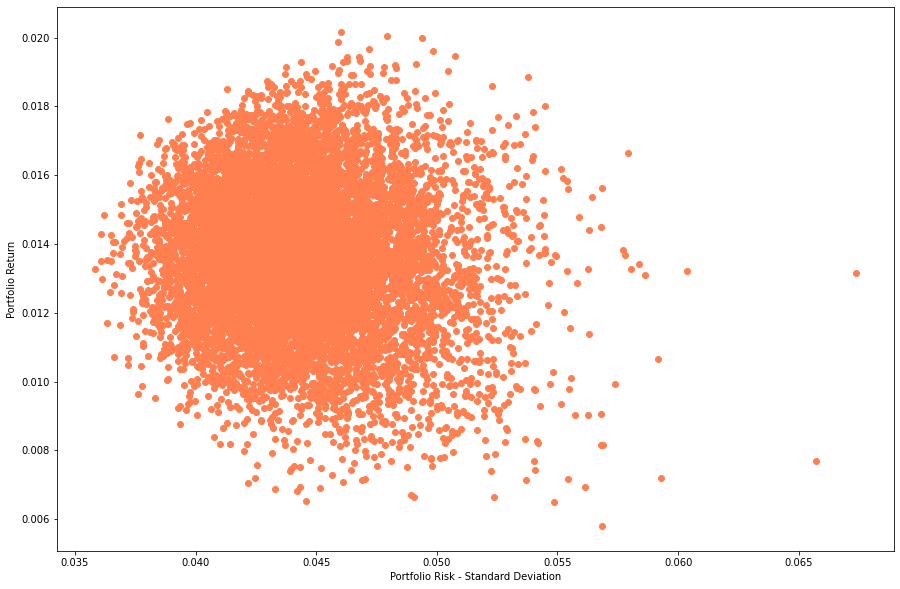

In [37]:
plt.figure(figsize = (15,10))
plt.scatter(portfolio_risk, portfolio_return, c="coral")
plt.xlabel("Portfolio Risk - Standard Deviation")
plt.ylabel("Portfolio Return")
plt.show()

In [36]:
#converting to a csv file
portfolio_risk = pd.DataFrame(portfolio_risk, columns = ["portfolio risk"])
portfolio_return = pd.DataFrame(portfolio_return, columns = ["portfolio return"])
random_portfolio = pd.concat([portfolio_return, portfolio_risk, weights], axis =1)
random_portfolio.to_csv("Random_Portfolios2.csv")